#융합전자공학부 2015003654 이호영

### Load MNIST dataset from PyTorch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms

# MNIST dataset 
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           download=True,
                                           transform=transform)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Data type conversion

In [ ]:
# Change data type : torch.Tensor -> numpy array
X = train_dataset.train_data.numpy()
y = train_dataset.train_labels.numpy()
print('Data size: ' + str(X.shape))

num_samples, height, width = X.shape 
dim = height * width

Data size: (60000, 28, 28)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


### Data visualization

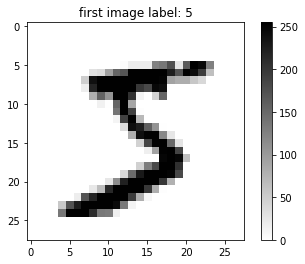

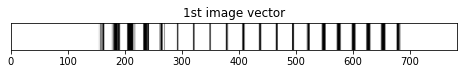

In [ ]:
# Visualize MNIST data (1st digit)
plt.imshow(X[0],cmap = 'gray_r')
plt.title('first image label: 5')
plt.colorbar()
plt.show()
# Visualize MNIST data in a vector form (1st digit)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,0.5))
axes.imshow(X[0].reshape(1,-1),cmap = 'gray_r')   # X[0].reshape(1,-1) -> (1x784)
axes.set_title('1st image vector')
axes.set_yticks([])
axes.set_aspect('auto')
plt.show()

### Principal Component Analysis (PCA)

In [ ]:
# Step 0: Vectorize all images
X = X.reshape(-1,dim)

# Step 1: Subtract the mean
X_mean = np.mean(X,axis=0)
X_0 = X - X_mean
print("Mean Subtracted!")

# Step 2: Compute Data Covariance by two equivalent ways
covX_0 = np.cov(X_0.T)    # covX_0 = (1/num_samples-1)*np.matmul(X_0.T,X_0)
print("Covariance Matrix computed!")

# Step 3: Compute Eigenvalues & Eigenvectors of Covariance Matrix
U, s, Vh = np.linalg.svd(covX_0)    # U : (784,784) , s : (784,) , Vh : (784,784)
print("Eigenvalues & Eigenvectors obtained by np.linalg.svd!")

Mean Subtracted!
Covariance Matrix computed!
0
Eigenvalues & Eigenvectors obtained by np.linalg.svd!


### Fraction of variance
$FoV(k) = \frac{\sum_i^k s_i}{\sum_i^D s_i}$<br>

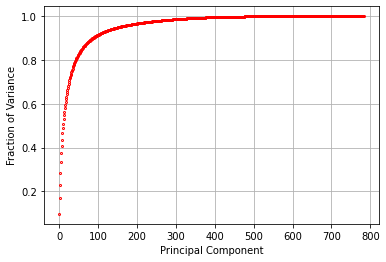

In [ ]:
FoV = np.cumsum(s)/np.sum(s)
plt.plot(FoV,'ro',linewidth = 0.2,markersize=2,fillstyle='none')
plt.grid(True)
plt.xlabel('Principal Component')
plt.ylabel('Fraction of Variance')
plt.show()

In [ ]:
print(f"We need at least {np.where(FoV >= 0.8)[0][0]} principal components to capture 80% of the total variance.")

We need at least 43 principal components to capture 80% of the total variance.


### Low-dimensional reconstruction

$\hat{x}_i = \overline{x} + \sum_{k=1}^K (x_i\cdot e_k) e_k$<br>
where<br>
$x_i$ is the i-th image sample,<br>
$e_k$ is the eigenvector of k-th largest eigenvalue,<br>
$\overline{x}$ is the mean of entire images,<br>
$\hat{x}_i$ is the reconstructed image from $K$ eigenvectors.

In [ ]:
K = 100
X_hat = np.zeros((K,dim))
X_hat[0,:] = np.dot(X_0[0,:],U[:,0]) *U[:,0]    # 시그마를 구현하기 위한 초기값 설정
for i in range(1,K):
  X_hat[i,:] = np.dot(X_0[0,:],U[:,i]) *U[:,i] + X_hat[i-1,:]   # 첫번째 이미지를 eigenvector 개수를 늘려가며 X_hat에 저장
X_hat += X_mean   # Zero centering 복구를 위한 평균 더하기

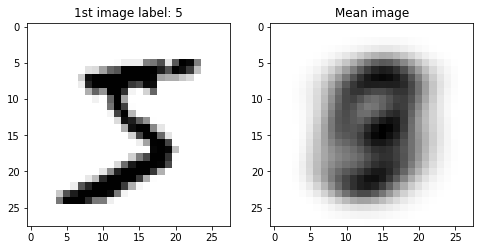

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,6))

axes[0].imshow(X[0].reshape(height,width),cmap='gray_r')
axes[0].set_title("1st image label: 5")

axes[1].imshow(X_mean.reshape(height,width),cmap='gray_r')
axes[1].set_title("Mean image")

plt.show()

Image 1 reconstructed by k number of eigenvectors:


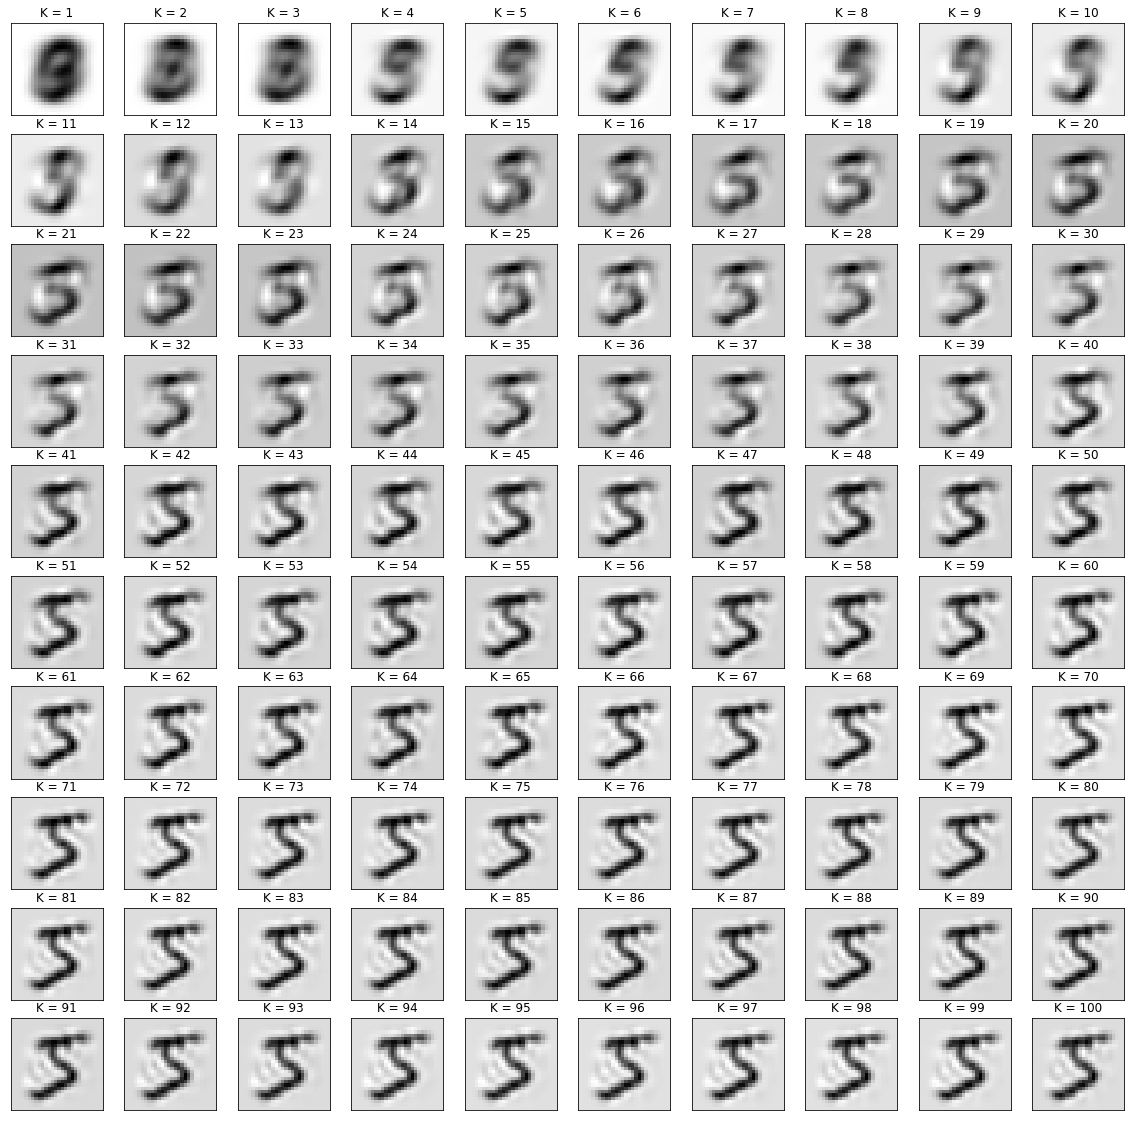

In [ ]:
fig, axes = plt.subplots(nrows=10, ncols = 10, figsize=(20,20))

for row in range(10):
  for col in range(10):
    axes[row, col].imshow(X_hat[10*row+col,:].reshape(height,width),cmap='gray_r')
    axes[row, col].set_yticks([])
    axes[row, col].set_xticks([])
    axes[row, col].set_title(f'K = {10*row+col+1}')

print("Image 1 reconstructed by k number of eigenvectors:")
plt.show()